<a href="https://colab.research.google.com/github/alvinadar/Logistics-Regression/blob/main/Logistics_Regression_%26_Other_Classification_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic regression is used for classification problems, where you want to predict a category or class.  Unlike linear regression, which predicts a continuous value, logistic regression predicts the probability of belonging to a certain class.  Since probabilities are between 0 and 1.

#Most suitable for binary classification.



*   Target should be only Yes or No /True or False (Binary Classification)
*   You cannot have more than 2 output, (Green, Blue , Red)

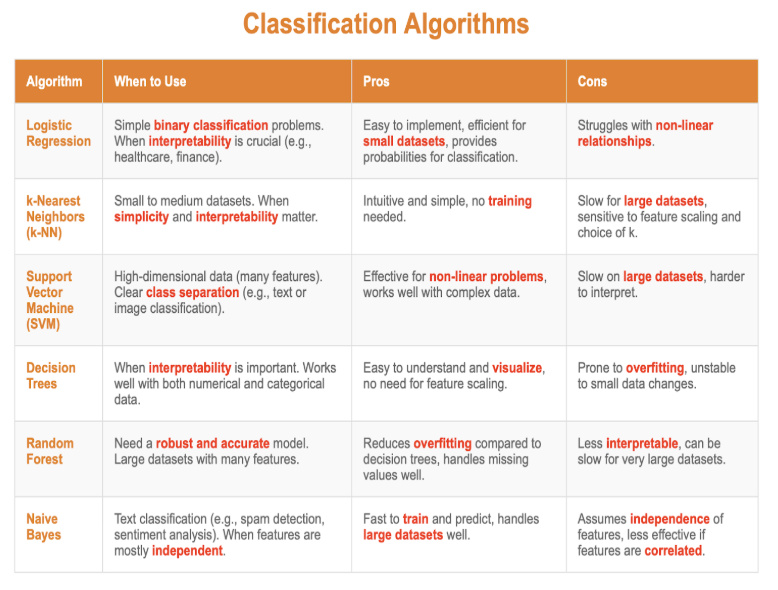

##Linear regression formula

##Linear regression formula

* Based on binary outputs only
* When you see the x-axis (Continous) and y-categorical, automatically you should know this belongs to a classification problem.

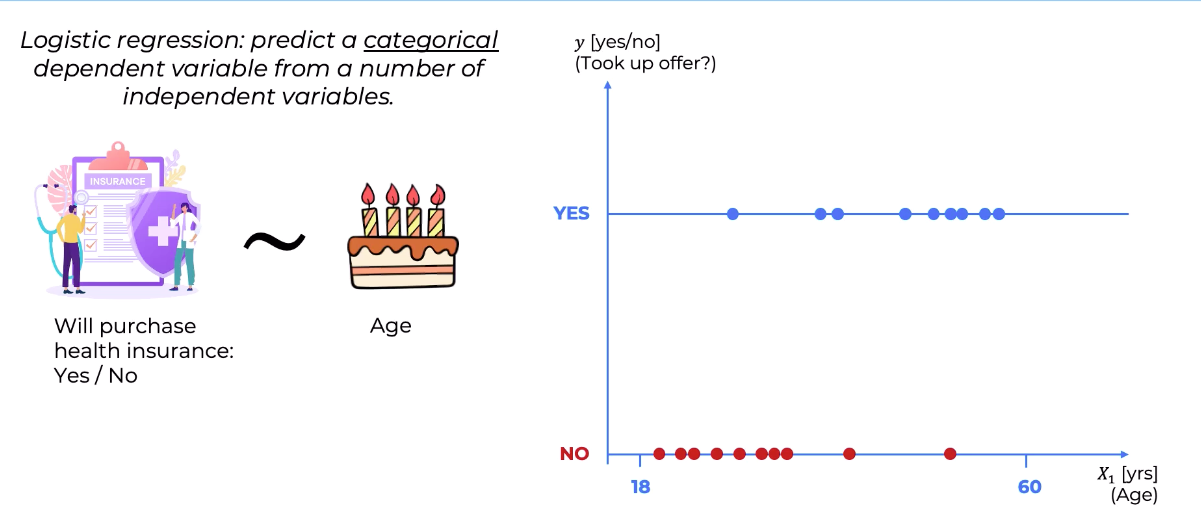

##Based on the given data , we cant simply implement a linear regression.Which is a slope line through this data which will not make sense, therefore we will implement logistics regression.

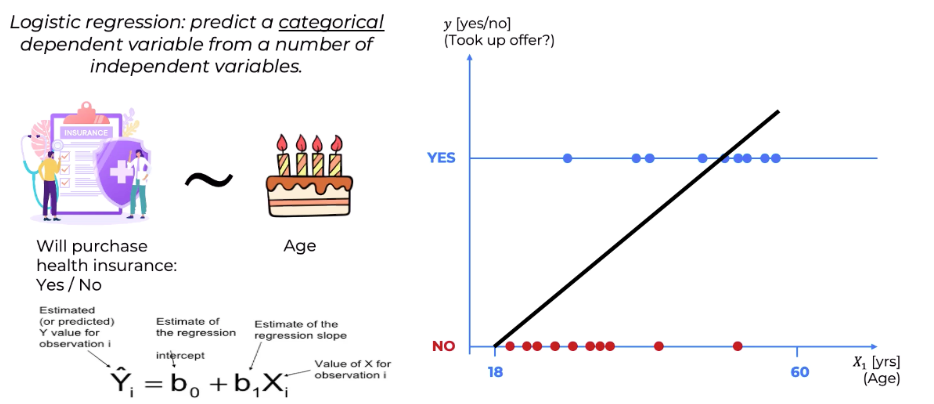!

##Linear Regression Fromula

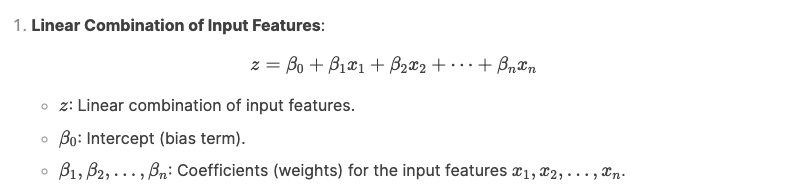

##Instead we implement a logistic regression curve also known as sigmoid curve based on the derived formula.

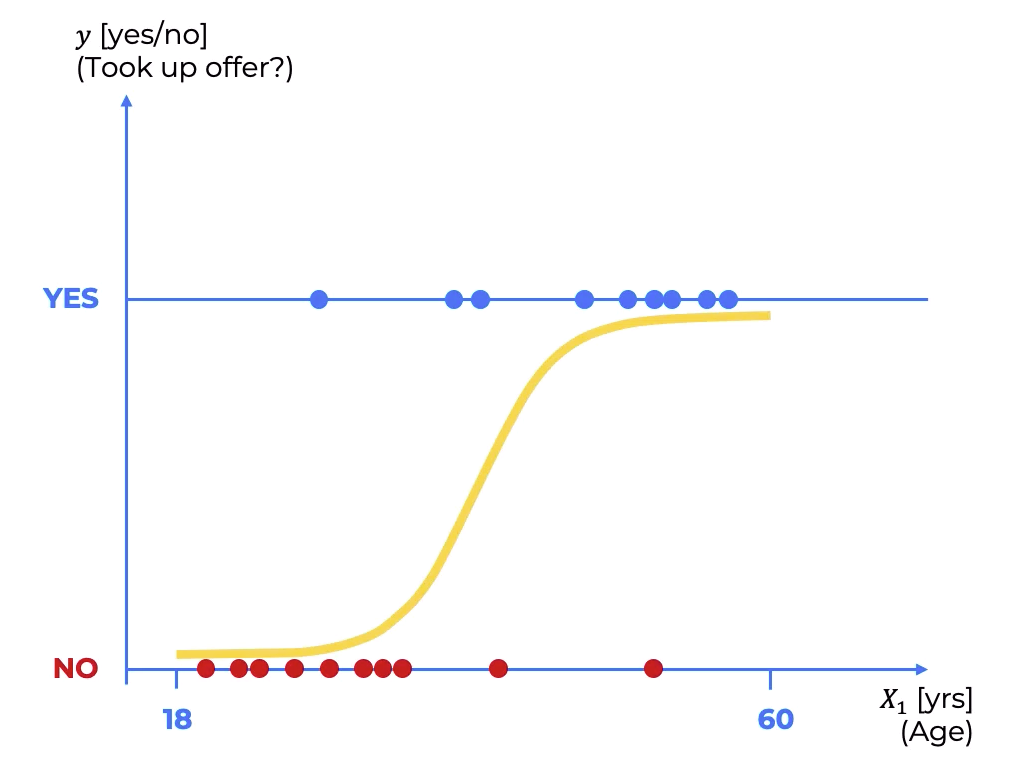

#Logistics sigmoid function

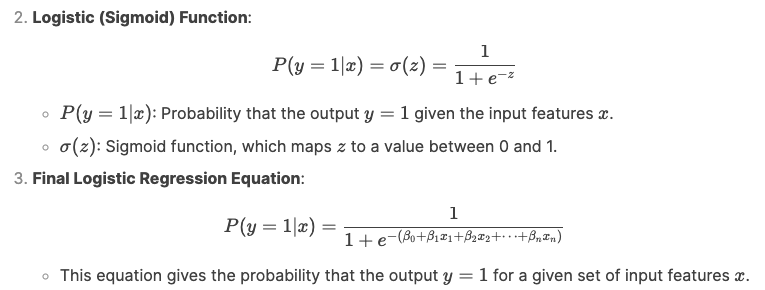

#Now we have a logistic regression ,but how does it applied to new data?

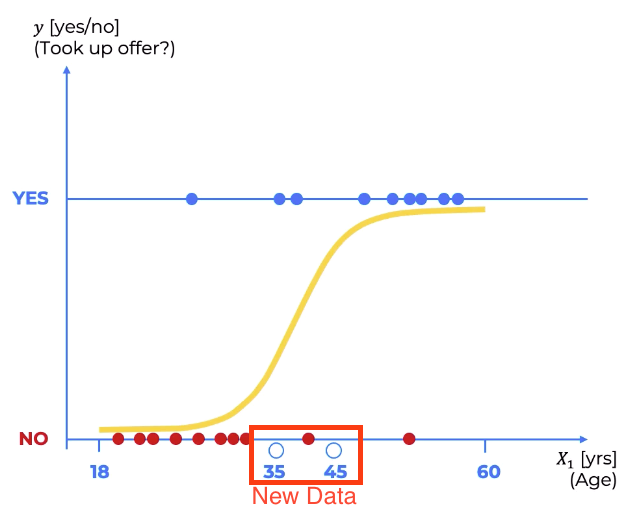

##The data is then projected on the logistics regression. The logistics regression will return the probability.

* With the new data people with the age of 35 has 42 percent probability of taking an insurance plan.

* Those in the age of 45 has 81 percent probability of taking up an insurance plan.

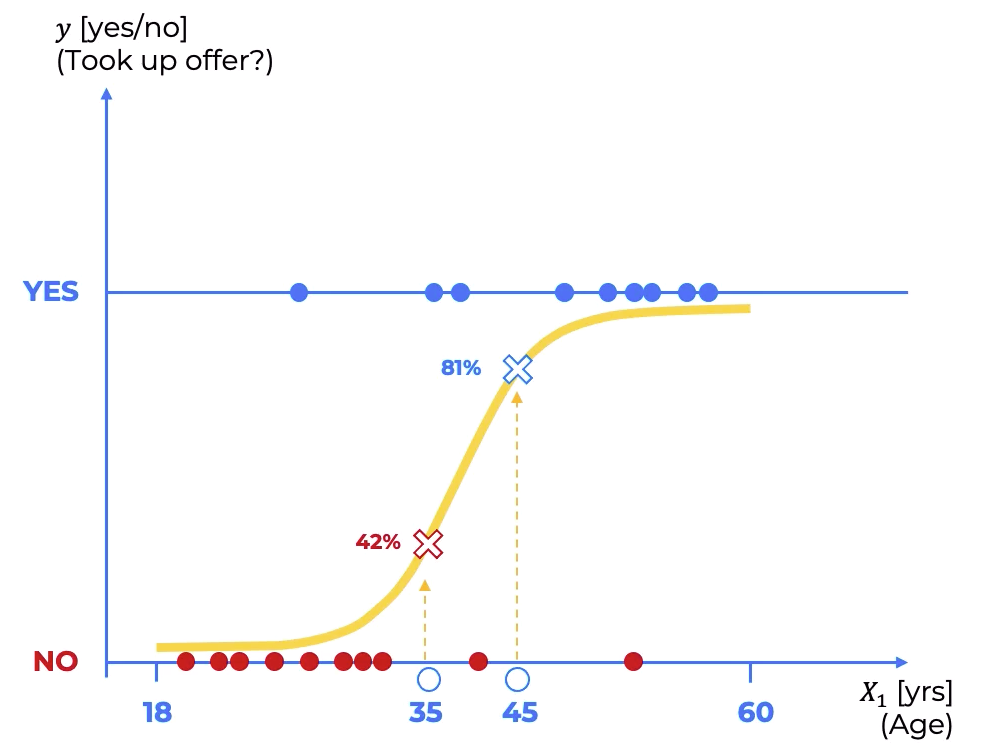

##In this intance we need a binary outcome not a probability.So we split the logistics regression to two where those with `>50%` probability will provide an outcome of `Yes` and those with < 50% probability will provide an outcome of `No`.

* Based on the given outcome those at the age of 45 will return `Yes` means they will purchase the insurance.
* Those that are at the age of 35 will return a `No` meaning they will not purchase the insurance plan.

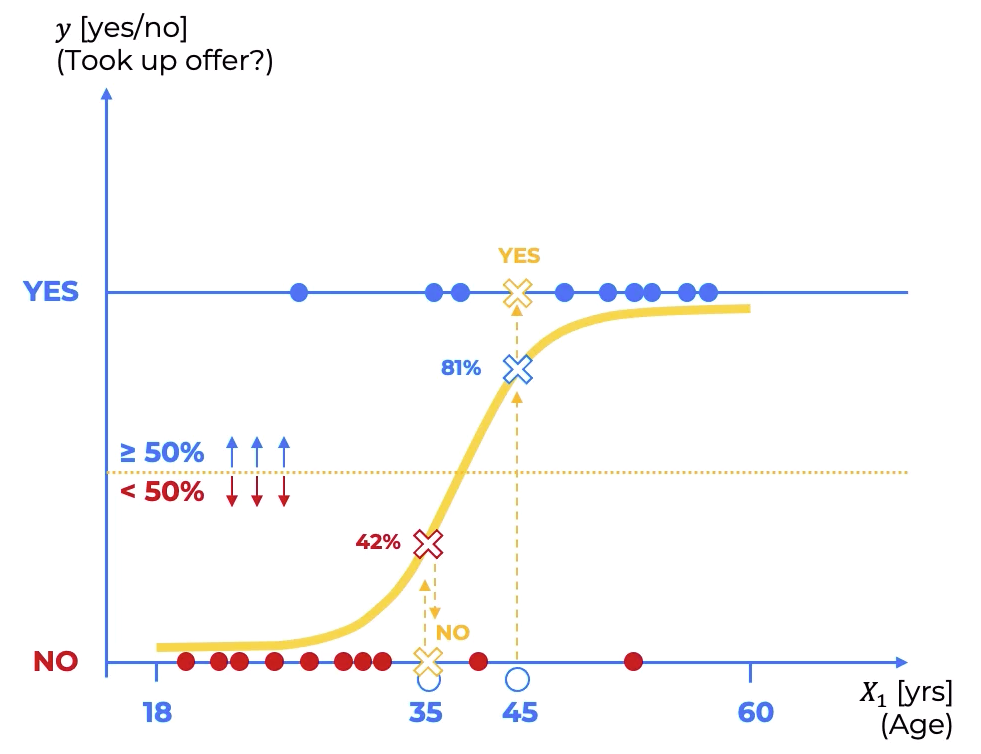!


##Similar to multiple linear regression logistics regression could cater for multiple independent variable.

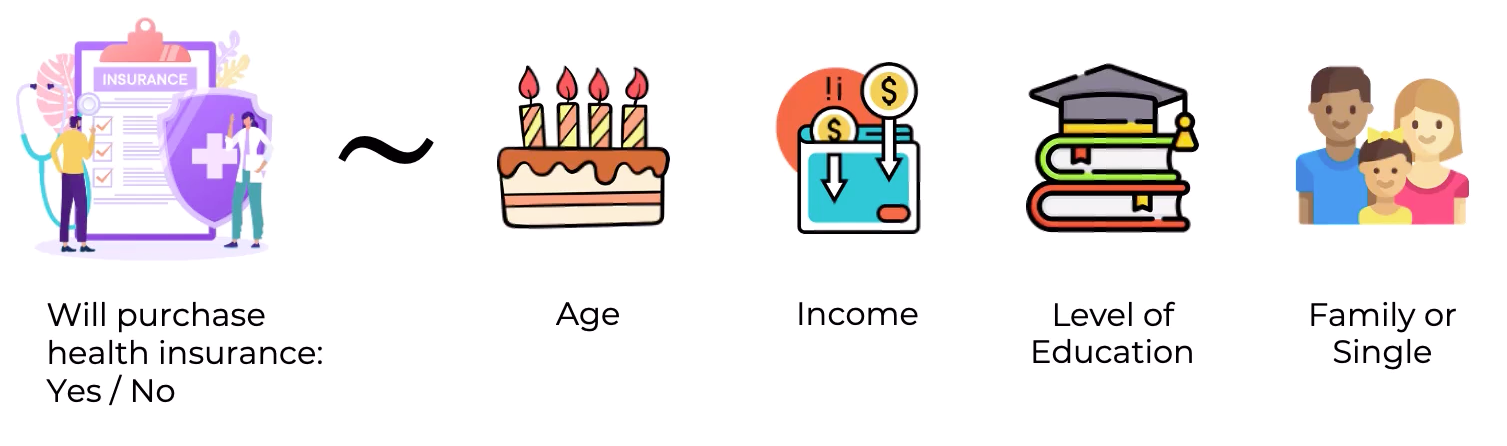

#Example 1 : Predicting Whether a Student Passes or Fails an Exam

In [53]:
#Import necessary library
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix#Help to visualize how the model if performing and shows type 1 and type 2 error


In [54]:
# Data
data = {'Hours_Studied': [1, 2, 3, 4, 5, 6, 7],
        'Pass_Fail': [0, 0, 0, 1, 1, 1, 1]}#Numerical categories 0:Fail/1:Pass
df = pd.DataFrame(data)

In [55]:
df

,Hours_Studied,Pass_Fail
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,6,1
6,7,1


In [56]:
# Split features and target variable
X = df[['Hours_Studied']]#Input
y = df['Pass_Fail']#Output

In [57]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [58]:
#Predict the passing and failing of a student
student_study_hours = float(input("Please enter the student study hours:"))

hours_studied = np.array([student_study_hours]).reshape(-1,1)

probability_of_passing = model.predict_proba(hours_studied)[0][1]

print("The probability of passing is:",np.round(probability_of_passing,2))

if probability_of_passing >= 0.5:
  print("The student will pass the exam.")
else:
  print("The student will fail the exam")

Please enter the student study hours:2
The probability of passing is: 0.15
The student will fail the exam


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [59]:
#Predict the target value
y_pred = model.predict(X)

#Create the confusion matrix

conf_matrix = confusion_matrix(y,y_pred)

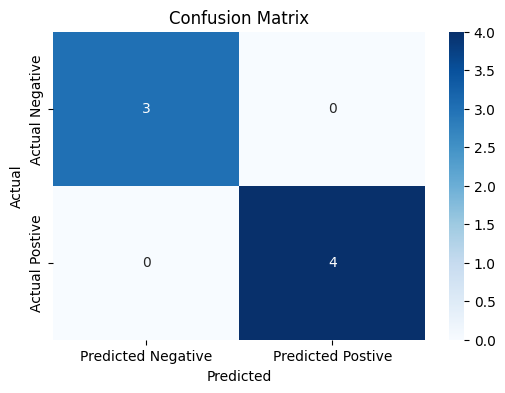

In [60]:
plt.figure(figsize=(6,4))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="Blues",
            xticklabels=["Predicted Negative","Predicted Postive"],
            yticklabels=["Actual Negative","Actual Postive"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Example 2: Hr Analytics Logistics Regression

##At the end of this session we are able to predict if the employee is going to resign or not.

#Loading Data

In [61]:
df = pd.read_csv("/content/HR_comma_sep (1).csv")

In [62]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


###In this given dataset we are going to predict the employees who will be retained based on the given characterisitics

In [64]:
from sklearn.preprocessing import LabelEncoder#Helps to convert the non numerical value to numerical values

le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df['Department'] = le.fit_transform(df['Department'])

In [65]:
#Seperate the features (X) and the target variables(y)
X = df.drop('left',axis = 1)#Drop the left and remain the rest for the input
y = df['left']#Output

In [66]:
#Split the data to training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [67]:
#Create and train the model
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
#Make prediction and evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)#Get the predicted output based on the reserved data
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(accuracy,2)}")

Accuracy:0.76


In [69]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)

In [70]:
conf_matrix

array([[2111,  183],
       [ 545,  161]])

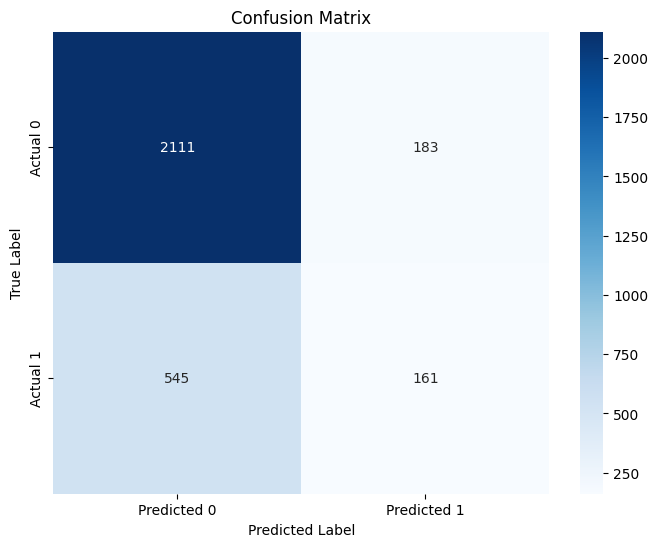

In [71]:
# Plot the confusion matrix as a heatmap

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<Axes: >

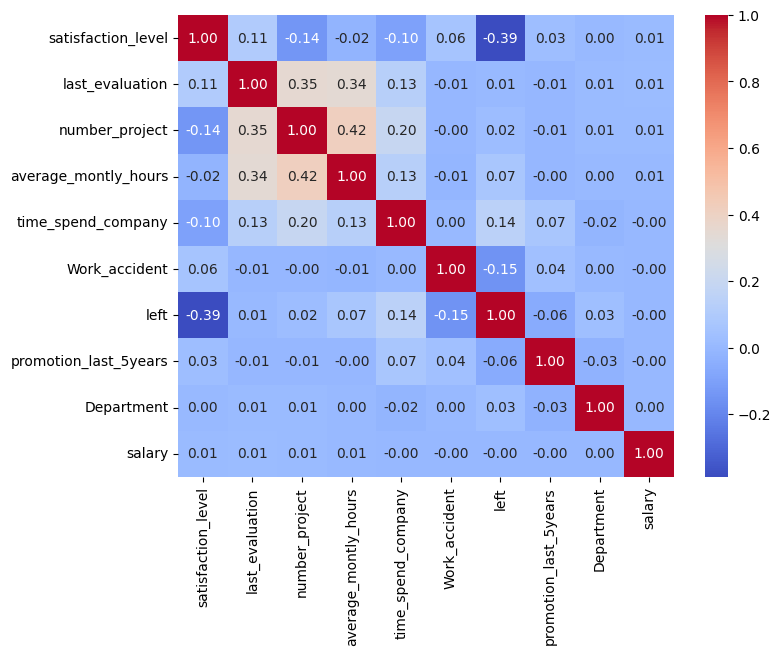

In [72]:
#Check the corelation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt = '.2f')

# Self Study - More Classification Algos

https://drive.google.com/drive/folders/1xHsWUUn-lM06r8DfgO_FNIOY4to7J3Is?usp=sharing